In [1]:
# Libraries used
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv('data_final.csv')
data.head()

,P(cancer),avg years of vaping,access to health care
0,0.0100,0.337286,10.23768
1,0.0115,1.345584,10.81874
2,0.0130,1.477897,11.43779
3,0.0145,0.664809,11.54056
4,0.0160,0.915358,11.64395


In [12]:
data.describe()

,P(cancer),avg years of vaping,access to health care
count,101.00000,101.000000,101.000000
mean,0.08500,8.477349,10.097708
std,0.04395,4.501034,1.632993
min,0.01000,0.337286,6.862980
25%,0.04750,4.821589,8.458349
50%,0.08500,8.599050,10.068440
75%,0.12250,12.293590,11.625170
max,0.16000,16.017460,12.825900


In [13]:
data['X1'] = data['avg years of vaping']
data['X2'] = data['access to health care']
data['Y'] = data['P(cancer)']

In [25]:
X1 = data['X1'].sum()
X2 = data['X2'].sum()
Y = data['Y'].sum()
X1_square = ((data['X1'])*(data['X1'])).sum()
X2_square = ((data['X2'])*(data['X2'])).sum()
Y_square = ((data['Y'])*(data['Y'])).sum()
X1Y = ((data['X1'])*(data['Y'])).sum()
X2Y = ((data['X2'])*(data['Y'])).sum()
X1,X2,Y,X1_square,X2_square, Y_square, X1Y,X2Y

(856.212204,
 1019.868533,
 8.585,
 9284.340249914812,
 10565.001431825403,
 0.9228875,
 92.47878551850002,
 82.27367857099999)

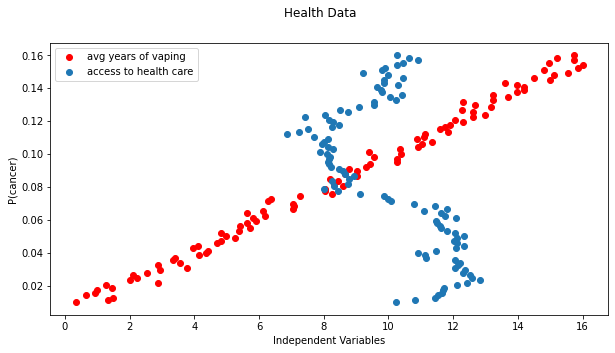

In [26]:
plt.figure(figsize=(10,5))
plt.suptitle('Health Data')
plt.xlabel('Independent Variables')
plt.ylabel('P(cancer)')
plt.scatter(data['X1'],data['Y'], color = 'r')
plt.scatter(data['X2'],data['Y'])
plt.legend(['avg years of vaping','access to health care'], loc='best')

# Inference from the graph

From the graph it is evident that Avg years of vaping has a linear relationship with the probability of getting cancer, however the realtionship between P(cancer) and Acces ti health care is not linear.

# The correaltion coefficient

In [27]:
r_X1 = (101*X1Y - (X1*Y)) / ((math.sqrt((101*X1_square)-(X1*X1))) * (math.sqrt((101*Y_square) - (Y*Y))))
r_X2 = (101*X2Y - (X2*Y)) / ((math.sqrt((101*X2_square)-(X2*X2))) * (math.sqrt((101*Y_square) - (Y*Y))))
r_X1,r_X2

(0.9958845395304512, -0.615176127728155)

# Inference

Like we have seen in the graph, the Avg years of vaping and probability of getting cancer are highly-positively correlated, that is, probability of getting cancer increases with increase in the number of years of vaping. But the correlation coefficient shows that access to health care and probability of getting cancer have some negative correaltion. 


# Models

# Single Linear Regression

# For avg years of vaping

In [28]:
m = ((101*X1Y) - (X1*Y)) /((101*X1_square) -(X1*X1))
m

0.009724293950384572

In [29]:
b = (Y - m*X1)/101
b

0.0025637707366075245

In [30]:
data['Predicted_Y_with_X1'] = data['X1']*m + b

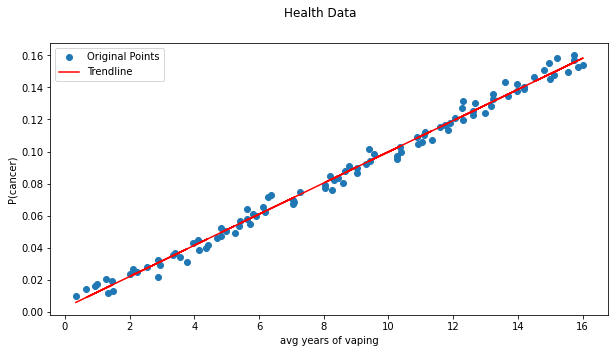

In [86]:
plt.figure(figsize=(10,5))
plt.suptitle('Health Data')
plt.xlabel('avg years of vaping')
plt.ylabel('P(cancer)')
plt.scatter(data['X1'],data['Y'], label = 'Original Points')

z = np.polyfit(data['X1'],data['Y'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(data['X1'], data['Predicted_Y_with_X1'], color = 'r', label = 'Trendline')
plt.legend()

# Residuals

In [35]:
data['Residuals'] = data['Y'] - data['Predicted_Y_with_X1']
data['Ranked_Residuals'] = data['Residuals'].sort_values(ascending=False).values
data.head()

,P(cancer),avg years of vaping,access to health care,X1,X2,Y,Predicted_Y_with_X1,Residuals,Ranked_Residuals
0,0.0100,0.337286,10.23768,0.337286,10.23768,0.0100,0.005844,0.004156,0.009390
1,0.0115,1.345584,10.81874,1.345584,10.81874,0.0115,0.015649,-0.004149,0.008680
2,0.0130,1.477897,11.43779,1.477897,11.43779,0.0130,0.016935,-0.003935,0.008585
3,0.0145,0.664809,11.54056,0.664809,11.54056,0.0145,0.009029,0.005471,0.007910
4,0.0160,0.915358,11.64395,0.915358,11.64395,0.0160,0.011465,0.004535,0.007884


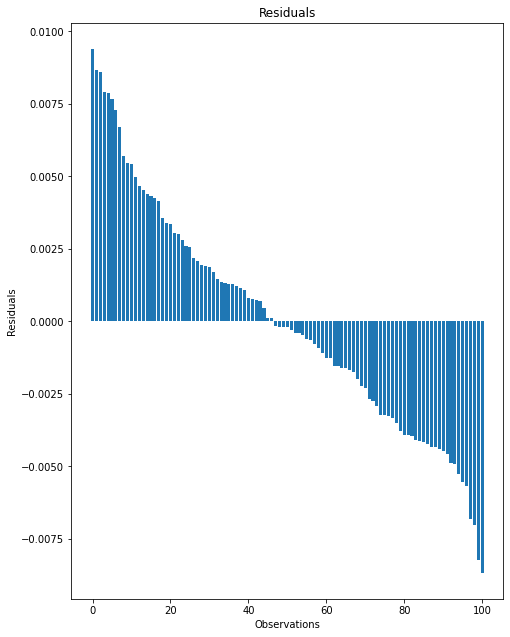

In [48]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,2])
plt.title('Residuals')
plt.xlabel('Observations')
plt.ylabel('Residuals')
ax.bar(range(len(data)),data['Ranked_Residuals'])
plt.show()

In [78]:
round(data['Ranked_Residuals'].max(),4), round(data['Ranked_Residuals'].min(),5)

(0.0094, -0.00867)

# Residual Interpretation


The residuals of this model show a range of (0.0094, -0.00867).

In [37]:
import numpy as np
MSE = np.square(np.subtract(data['Y'],data['Predicted_Y_with_X1'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.003963488899325733


In [79]:
SSR = (np.square(data['Y']-data['Predicted_Y_with_X1'])).sum()
print(SSR)
Y_mean = data['Y'].mean()
print(Y_mean)
SST = (np.square(data['Y']-Y_mean)).sum()
print(SST)
R_Square = 1 - (SSR/SST)
print(R_Square)

0.0015866336697629092
0.085
0.1931625
0.9917860160757761


# Inference from R^2

R_Square value is .99 for the model with P(cancer) and Average years of vaping. That is, 99% of the variability observed in the probability of cancer is explained by the model. 


# Single Linear Regression ---- For Access to health care

In [51]:
m2 = ((101*X2Y) - (X2*Y)) /((101*X2_square) -(X2*X2))
m2

-0.016556808442304716

In [52]:
b2 = (Y - m*X2)/101
b2

0.2521858211605478

In [53]:
data['Predicted_Y_with_X2'] = data['X2']*m2 + b2

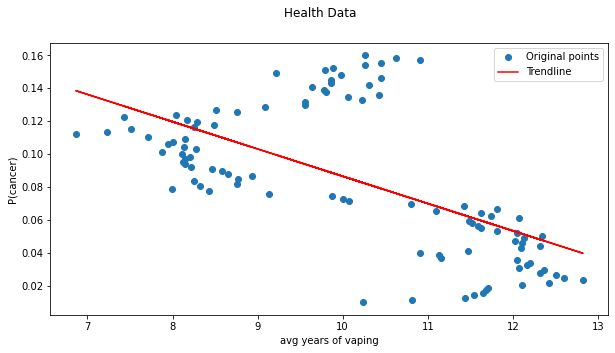

In [85]:
plt.figure(figsize=(10,5))
plt.suptitle('Health Data')
plt.xlabel('avg years of vaping')
plt.ylabel('P(cancer)')
plt.scatter(data['X2'],data['Y'], label = 'Original points')

z = np.polyfit(data['X2'],data['Y'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(data['X2'], data['Predicted_Y_with_X2'], color = 'r', label = 'Trendline')
plt.legend()

# Residuals

In [58]:
data['Residuals_X2'] = data['Y'] - data['Predicted_Y_with_X2']
data['Ranked_Residuals_X2'] = data['Residuals_X2'].sort_values(ascending=False).values
data.head()

,P(cancer),avg years of vaping,access to health care,X1,X2,Y,Predicted_Y_with_X1,Residuals,Ranked_Residuals,Predicted_Y_with_X2,Residuals_X2,Ranked_Residuals_X2
0,0.0100,0.337286,10.23768,0.337286,10.23768,0.0100,0.005844,0.004156,0.009390,0.082683,-0.072683,0.085496
1,0.0115,1.345584,10.81874,1.345584,10.81874,0.0115,0.015649,-0.004149,0.008680,0.073062,-0.061562,0.082210
2,0.0130,1.477897,11.43779,1.477897,11.43779,0.0130,0.016935,-0.003935,0.008585,0.062813,-0.049813,0.077716
3,0.0145,0.664809,11.54056,0.664809,11.54056,0.0145,0.009029,0.005471,0.007910,0.061111,-0.046611,0.076246
4,0.0160,0.915358,11.64395,0.915358,11.64395,0.0160,0.011465,0.004535,0.007884,0.059399,-0.043399,0.071751


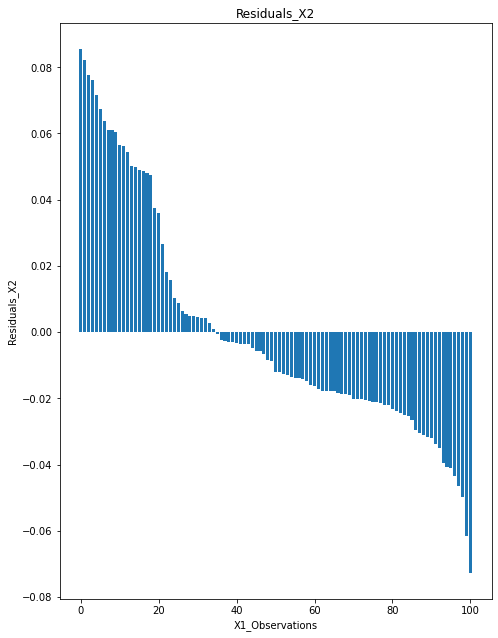

In [59]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,2])
plt.title('Residuals_X2')
plt.xlabel('X1_Observations')
plt.ylabel('Residuals_X2')
ax.bar(range(len(data)),data['Ranked_Residuals_X2'])
plt.show()

# Inference

In [82]:
round(data['Ranked_Residuals_X2'].max(),4), round(data['Ranked_Residuals_X2'].min(),5)

(0.0855, -0.07268)

### The residuals of this model show a range of (0.0094, -0.00867).

In [81]:
SSR = (np.square(data['Y']-data['Predicted_Y_with_X2'])).sum()
print(SSR)
Y_mean = data['Y'].mean()
print(Y_mean)
SST = (np.square(data['Y']-Y_mean)).sum()
print(SST)
R_Square = 1 - (SSR/SST)
print(R_Square)

0.12006176128049507
0.085
0.1931625
0.37844166812660285


# Inference from R^2

R_Square value is .37 for the model with P(cancer) and Access to health care. That is, 37% of the variability observed in the probability of cancer is explained by the model.

# Inference from models

### Model 1 ----  P(Cancer) with Avg years of vaping
Here the variable avg years of vaping is clearly affecting the probability of getting cancer, with high R_square value. 
### Model 2 ---- P(Cancer) with Access to health care
Here the variable access to health care is not that much affecting the probability of getting cancer, from the model we can see that the R_square value is very low. 

# Multiple Linear Regression

Here we are discusing about the possibility of predicting the P(cancer) when the two independent variables come together.

In [40]:

import numpy as np
from sklearn.linear_model import LinearRegression

In [56]:
import pandas as pd
import statsmodels.formula.api as smf
mod = smf.ols('Y ~ X1+X2', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6068.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          1.90e-103
Time:                        13:35:31   Log-Likelihood:                 416.55
No. Observations:                 101   AIC:                            -827.1
Df Residuals:                      98   BIC:                            -819.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0034      0.004     -0.875      0.3

# Inference for Multiple linear regression


Here the R square value is 99.2% , and the from the table we can see that the variable access to the health care is not significant in this model. But the average years of voping is signifcant. 

# Sensitivity Analysis

In [63]:
def linear_regression(data):
    X = data['X'].sum()
    Y = data['Y'].sum()
    X_square = ((data['X'])*(data['X'])).sum()
    Y_square = ((data['Y'])*(data['Y'])).sum()
    XY = ((data['X'])*(data['Y'])).sum()
    n = len(data['X'])
    m = ((n*XY) - (X*Y)) /((n*X_square) -(X*X))
    b = (Y - m*X)/n
    data['Predicted_Y_with_X'] = data['X']*m + b
    SSR = (np.square(data['Y']-data['Predicted_Y_with_X'])).sum()
    #print(SSR)
    Y_mean = data['Y'].mean()
    #print(Y_mean)
    SST = (np.square(data['Y']-Y_mean)).sum()
    #print(SST)
    R_Square = 1 - (SSR/SST)
    #print(R_Square)
    return m,b,R_Square

In [14]:
df = data

In [62]:
df.head()

,P(cancer),avg years of vaping,access to health care
23,0.0445,4.099452,12.321640
51,0.0865,9.021270,8.931004
35,0.0625,6.184133,11.747550
10,0.0250,2.224420,12.595890
2,0.0130,1.477897,11.437790


In [64]:
df.rename(columns = {'P(cancer)':'Y', 'avg years of vaping':'X'}, inplace = True)

In [65]:
shuffled = df.sample(frac=1)
result = np.array_split(shuffled, 5)

In [66]:
arraysList = []
for i in result:
    arraysList.append(i) 

In [67]:
data1 = arraysList[1]
data2 = arraysList[2]
data3 = arraysList[3]
data4 = arraysList[4]
data5 = arraysList[0]

In [68]:
data1.head()

,Y,X,access to health care
51,0.0865,9.021270,8.931004
4,0.0160,0.915358,11.643950
16,0.0340,3.570197,12.204410
23,0.0445,4.099452,12.321640


In [114]:
Final_table = {'m': [0.008813699422888496,0.010499213064002082,0.009906783044794362,0.010127848053580581,0.0084867028858425],
        'b': [0.0064558916414712494, -0.006866091737179905, 0.00035932984011147195, -0.0009451420110895142,0.00829530733761976],
         'R_Square' :[0.9919868716173572,0.9962786617766924,0.9962870074073665,0.997515059197745,0.9925088163134763]     
              }

In [72]:
linear_regression(data1),linear_regression(data2),linear_regression(data3),linear_regression(data4),linear_regression(data5)

((0.008813699422888496, 0.0064558916414712494, 0.9919868716173572),
 (0.010499213064002082, -0.006866091737179905, 0.9962786617766924),
 (0.009906783044794362, 0.00035932984011147195, 0.9962870074073665),
 (0.010127848053580581, -0.0009451420110895142, 0.997515059197745),
 (0.0084867028858425, 0.00829530733761976, 0.9925088163134763))

In [75]:
Final_table = pd.DataFrame(Final_table)
Final_table

,m,b,R_Square
0,0.008814,0.006456,0.991987
1,0.010499,-0.006866,0.996279
2,0.009907,0.000359,0.996287
3,0.010128,-0.000945,0.997515
4,0.008487,0.008295,0.992509


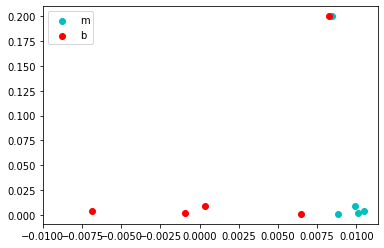

In [98]:
plt.scatter(Final_table['m'], [.001,.004,.009,.0016,.20], color = 'c')
plt.scatter(Final_table['b'], [.001,.004,.009,.0016,.20], color = 'r')
plt.xlim(xmin=-.01)
plt.legend(['m','b'], loc='best')
plt.show()

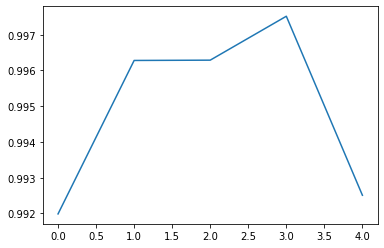

In [115]:
plt.plot(Final_table['R_Square'])

# Inference

After subsetting the datasets into 5 random sample set, we have calculated the R_square for each sets and found that the R_sqaure value is not much different each other, however, the b value varies from negative to positive at some time. So this datset has robust model.

# For second variable

In [100]:
df = data
df.rename(columns = {'P(cancer)':'Y', 'access to health care':'X'}, inplace = True)

In [101]:
shuffled = df.sample(frac=1)
result = np.array_split(shuffled, 5)

In [102]:
arraysList = []
for i in result:
    arraysList.append(i) 

In [103]:
data1 = arraysList[1]
data2 = arraysList[2]
data3 = arraysList[3]
data4 = arraysList[4]
data5 = arraysList[0]

In [104]:
data1.head()

,Y,avg years of vaping,X
82,0.1330,13.23949,10.228090
69,0.1135,11.83526,7.232464
55,0.0925,9.31363,8.212241
20,0.0400,4.35524,10.903340
91,0.1465,14.51492,10.454260


In [105]:
linear_regression(data1),linear_regression(data2),linear_regression(data3),linear_regression(data4),linear_regression(data5)

((-0.008868085218772855, 0.1844274619571002, 0.08723514131368049),
 (-0.013588461979722962, 0.21121555630591207, 0.5739331956141326),
 (-0.015035258436360053, 0.23293661877966523, 0.3113661587163856),
 (-0.024414700705385543, 0.33490743835725273, 0.5672552380427378),
 (-0.018806204452821534, 0.2813575707802073, 0.41779701587206475))

In [112]:
Final_table = {'m': [-0.008868085218772855,-0.013588461979722962,-0.015035258436360053,-0.024414700705385543,-0.018806204452821534],
        'b': [0.1844274619571002, 0.21121555630591207, 0.23293661877966523, 0.33490743835725273,0.2813575707802073],
         'R_Square' :[0.08723514131368049,0.5739331956141326,0.3113661587163856,0.5672552380427378,0.41779701587206475]     
              }

In [107]:
Final_table = pd.DataFrame(Final_table)
Final_table

,m,b,R_Square
0,-0.008868,0.184427,0.087235
1,-0.013588,0.211216,0.573933
2,-0.015035,0.232937,0.311366
3,-0.024415,0.334907,0.567255
4,-0.018806,0.281358,0.417797


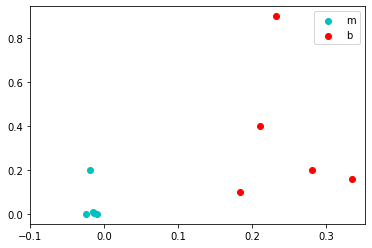

In [110]:
plt.scatter(Final_table['m'], [.001,.004,.009,.0016,.20], color = 'c')
plt.scatter(Final_table['b'], [.1,.4,.9,.16,.20], color = 'r')
plt.xlim(xmin=-.1)
plt.legend(['m','b'], loc='best')
plt.show()

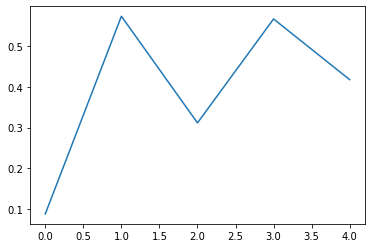

In [113]:
plt.plot(Final_table['R_Square'])

# Inference


After subsetting the datasets into 5 random sample sets, we have calculated the R_square for each sets and found that the R_sqaure value is different each other,  So this dataset has not robust model.

# Inferences and Interpretations










      
            
# Conclusion

So, in conclusion, we can say that the avg years of vaping is evidently affecting the probability of getting cancer much more than that of access to health care. Therefore, the company's claim seems to be not supported by this data. 

